# Predecir ingresos por persona

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def num_or_cat(df):
    categorical = df.select_dtypes(include='object').columns
    numerical = df.select_dtypes(exclude='object').columns

    return(categorical, numerical)

In [3]:
def remove_outliers(df, numeric_columns):
    df_filtered = df.copy()
    for column_name in numeric_columns:
        if pd.api.types.is_numeric_dtype(df[column_name]):
            q1 = df[column_name].quantile(0.25)
            q3 = df[column_name].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            df_filtered = df_filtered[(df_filtered[column_name] >= lower_bound) & (df_filtered[column_name] <= upper_bound)]
    return df_filtered

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
dataframe = pd.read_csv('./encuesta-anual-hogares-2018.csv', encoding='latin1')
dataframe.head(10)

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,estado_ocupacional,cat_ocupacional,calidad_ingresos_lab,ingreso_total_lab,calidad_ingresos_no_lab,ingreso_total_no_lab,calidad_ingresos_totales,ingresos_totales,calidad_ingresos_familiares,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,8,Resto de la Ciudad,16,Varon,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,2000,No tuvo ingresos,0,Tuvo ingresos y declara monto,2000,Tuvo ingresos y declara monto,2000,2000,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),7,Pais limitrofe,Solo sistema publico,NaN,No corresponde
1,2,1,1,9,Villas de emergencia,18,Mujer,Jefe,Unido/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,500,No tuvo ingresos,0,Tuvo ingresos y declara monto,500,Tuvo ingresos pero no declara monto,17500,5833,Asiste,Estatal/publico,Secundario/medio adultos,EGB (1° a 9° año),8,CABA,Solo sistema publico,Si,1
2,2,1,2,9,Villas de emergencia,37,Varon,Otro familiar,Unido/a,No corresponde,No corresponde,Ocupado,Asalariado,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos y declara monto,5000,Tuvo ingresos pero no declara monto,17000,Tuvo ingresos pero no declara monto,17500,5833,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,3,CABA,Solo sistema publico,NaN,No corresponde
3,2,1,3,9,Villas de emergencia,0,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,1,Inactivo,No corresponde,No corresponde,0,No corresponde,0,No corresponde,0,Tuvo ingresos pero no declara monto,17500,5833,Nunca asistio,No corresponde,No corresponde,NaN,Ningun año de escolaridad aprobado,CABA,Solo sistema publico,NaN,No corresponde
4,3,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Desocupado,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,6000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
5,4,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Desocupado,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,16500,Tuvo ingresos y declara monto,16500,Tuvo ingresos y declara monto,16500,16500,Asiste,Privado no religioso,Universitario,Otras escuelas especiales,12,Pais no limitrofe,Solo sistema publico,NaN,No corresponde
6,5,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,8000,Tuvo ingresos y declara monto,8000,Tuvo ingresos y declara monto,16000,8000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
7,5,1,2,2,Resto de la Ciudad,22,Mujer,Otro familiar,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,8000,Tuvo ingresos y declara monto,8000,Tuvo ingresos y declara monto,16000,8000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,16,PBA excepto GBA,Solo obra social,No,No corresponde
8,6,1,1,7,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,500,Tuvo ingresos pero no declara monto,300,Tuvo ingresos pero no declara monto,800,Tuvo ingresos pero no declara monto,15300,7650,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),9,Pais limitrofe,Solo sistema publico,No,No corresponde
9,6,1,2,7,Resto de la Ciudad,23,Mujer,Otro familiar,Soltero/a,Pad

In [6]:
#categorical_cols, numerical_cols= num_or_cat(dataframe)
#categorical_cols

In [7]:
#dataframe = remove_outliers(dataframe, numerical_cols)

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14497 entries, 0 to 14496
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           14497 non-null  int64 
 1   nhogar                       14497 non-null  int64 
 2   miembro                      14497 non-null  int64 
 3   comuna                       14497 non-null  int64 
 4   dominio                      14497 non-null  object
 5   edad                         14497 non-null  int64 
 6   sexo                         14497 non-null  object
 7   parentesco_jefe              14497 non-null  object
 8   situacion_conyugal           14496 non-null  object
 9   num_miembro_padre            14497 non-null  object
 10  num_miembro_madre            14497 non-null  object
 11  estado_ocupacional           14497 non-null  object
 12  cat_ocupacional              14497 non-null  object
 13  calidad_ingresos_lab         14

se hace un info para ver los valores faltantes, se procede a ir reemplazando

# Reemplazo de valores faltantes

un array con las columnas con valores faltantes para ir teniendo de referencia
en todas las columnas salvo nivel_max_educativo se descartaron los datos debido a que la cantidad faltante era bastante baja en comparacion con el tamaño del dataset, otro problema que se presenta para reemplazar es que no se encontro un valor especifico por el cual reemplazar estos valores

### nivel_max_educativo


In [9]:
def columnas_nan(df):
    columnas_val_faltantes = df.columns[df.isnull().any()].tolist()
    
    if columnas_val_faltantes:
        print(f"Columnas con nan: {', '.join(columnas_val_faltantes)}")
    else:
        print("clean")

In [10]:
columnas_nan(dataframe)

Columnas con nan: situacion_conyugal, sector_educativo, nivel_max_educativo, años_escolaridad, lugar_nacimiento, afiliacion_salud, hijos_nacidos_vivos, cantidad_hijos_nac_vivos


# hijos_nac_vivos

esta columna tenia aprox 5 mil valores faltantes pero al compararla con la columna de al lado cantidad_hijos_nac_vivos se veia que coincidian los valores faltantes con las personas que tenian 0 (no corresponde antes del cambio). por lo cual se llenaron los valores faltantes con 'No'

+ ((dataframe['hijos_nacidos_vivos'].isnull()) & (dataframe['cantidad_hijos_nac_vivos'] == 0)).value_counts() este filtro fue util para revisar si el cambio era correcto

In [11]:
dataframe[dataframe['hijos_nacidos_vivos'].isna()]
dataframe['hijos_nacidos_vivos'] = dataframe['hijos_nacidos_vivos'].fillna('No')

# cantidad_hijos_nacidos_vivos

para la cantidad de hijos nacidos se asume que 0 equivale a no corresponde ya que coincidia con las filas de la columna hijos_nacidos_vivos cuando esta era igual a No. Por lo que se va a cambiar por 0, y se va a castear la columna a int ya que cambiando este valor toda la columna tiene valores numericos.
Luego de esto solo quedan dos valores faltantes los cuales se descartan

In [12]:
dataframe[dataframe['cantidad_hijos_nac_vivos'].isna()]

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,estado_ocupacional,cat_ocupacional,calidad_ingresos_lab,ingreso_total_lab,calidad_ingresos_no_lab,ingreso_total_no_lab,calidad_ingresos_totales,ingresos_totales,calidad_ingresos_familiares,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
12861,4857,1,2,4,Resto de la Ciudad,71,Mujer,Otro familiar,Soltero/a,No corresponde,No corresponde,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos pero no declara monto,8000,Tuvo ingresos pero no declara monto,8000,Tuvo ingresos pero no declara monto,16600,8300,No asiste pero asistió,No corresponde,No corresponde,Primario especial,12,Partido GBA,Solo obra social,No,NaN
14415,5773,1,1,14,Resto de la Ciudad,91,Mujer,Jefe,Soltero/a,No corresponde,No corresponde,Inactivo,No corresponde,No tuvo ingresos,0,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos pero no declara monto,12000,12000,No asiste pero asistió,No corresponde,No corresponde,Primario especial,12,CABA,Otros,Si,NaN


In [13]:
dataframe.dropna(subset =['cantidad_hijos_nac_vivos'], inplace=True)

In [14]:
reemplazo = {"No corresponde": 0}
dataframe['cantidad_hijos_nac_vivos'] = dataframe['cantidad_hijos_nac_vivos'].replace(reemplazo)
dataframe['cantidad_hijos_nac_vivos'] = dataframe['cantidad_hijos_nac_vivos'].astype(int)


# Situacion conyugal

Se descarto el valor en esta columna

In [15]:
dataframe['situacion_conyugal'].unique()

#dataframe[dataframe['situacion_conyugal'].isnull()] ['edad'].value_counts()

array(['Soltero/a', 'Unido/a', 'No corresponde',
       'Separado/a de unión o matrimonio', 'Casado/a', 'Viudo/a',
       'Divorciado/a', nan], dtype=object)

In [16]:
dataframe['situacion_conyugal'].value_counts()
dataframe['situacion_conyugal'].isna().sum()

1

In [17]:
dataframe.dropna(subset =['situacion_conyugal'], inplace=True)

# Sector educativo

a esta variable le faltan solo dos datos los cuales seran descartados

In [18]:
dataframe['sector_educativo'].unique()

array(['No corresponde', 'Estatal/publico', 'Privado no religioso',
       'Privado religioso', nan], dtype=object)

In [19]:
dataframe['sector_educativo'].value_counts()

dataframe[dataframe['sector_educativo'].isnull()] ['edad'].value_counts()

edad
12    1
1     1
Name: count, dtype: int64

In [20]:
dataframe['sector_educativo'] = dataframe['sector_educativo'].fillna('No corresponde')

# nivel_max_educativo
este es el que tendria que ver porque le faltan 1000 valores aprox

In [21]:
dataframe['nivel_max_educativo'].unique()

array(['EGB (1° a 9° año)', 'Sala de 5', nan, 'Otras escuelas especiales',
       'Primario especial', 'Primario comun', 'Secundario/medio comun',
       'No corresponde'], dtype=object)

In [22]:
dataframe['nivel_max_educativo'].value_counts()

nivel_max_educativo
Secundario/medio comun       3520
Otras escuelas especiales    2587
Primario especial            2314
EGB (1° a 9° año)            2224
Sala de 5                    1656
Primario comun               1024
No corresponde                 60
Name: count, dtype: int64

In [23]:
dataframe['nivel_max_educativo'].isna().sum()

1109

In [24]:
dataframe.loc[(dataframe['nivel_max_educativo'].isnull()) & (dataframe['edad'] >= 0) & (dataframe['edad'] <= 5), "nivel_max_educativo"] = "No corresponde"

In [25]:
dataframe[dataframe['nivel_max_educativo'].isnull()] ['edad'].value_counts()
dataftame = dataframe[dataframe['nivel_max_educativo'].isnull() ]

In [26]:
dataframe.dropna(subset =['nivel_max_educativo'], inplace=True)

# años_escolaridad
a esta variable se le cambia ningun año aprobado por 0 para despues poder castear la columna a enteros

tengo 85 valores faltantes, al no ser una cantidad tan significativa seran descartados

In [27]:
dataframe['años_escolaridad'].isna().sum()

84

In [28]:
dataframe['años_escolaridad'] = dataframe['años_escolaridad'].replace("Ningun año de escolaridad aprobado", 0)

In [29]:
dataframe['años_escolaridad'].unique()

array(['7', '8', '3', 0, '12', '16', '9', '11', '15', '14', '13', '5',
       '10', '17', '4', '1', '19', '6', '18', '2', nan], dtype=object)

In [30]:
dataframe.dropna(subset =['años_escolaridad'], inplace=True)
dataframe['años_escolaridad'] = dataframe['años_escolaridad'].astype(int)

In [31]:
dataframe['años_escolaridad'].isna().sum()

0

# lugar_nacimiento

en esta variable tambien solo falta un valor el que se procede a descartarse

In [32]:
dataframe['lugar_nacimiento'].unique()

array(['Pais limitrofe', 'CABA', 'PBA excepto GBA', 'Pais no limitrofe',
       'Otra provincia', 'Partido GBA', 'PBA sin especificar', nan],
      dtype=object)

In [33]:
dataframe['lugar_nacimiento'].value_counts()

lugar_nacimiento
CABA                   8716
Otra provincia         1601
Pais limitrofe         1320
Partido GBA            1042
Pais no limitrofe      1036
PBA excepto GBA         577
PBA sin especificar       8
Name: count, dtype: int64

In [34]:
dataframe['lugar_nacimiento'].isna().sum()

1

In [35]:
dataframe.dropna(subset =['lugar_nacimiento'], inplace=True)

# afiliacion_salud
al igual que la variable anterior solo falta un valor y se va a descartar


In [36]:
dataframe['afiliacion_salud'].unique()

array(['Solo sistema publico', 'Solo obra social',
       'Solo plan de medicina prepaga por contratación voluntaria',
       'Solo prepaga o mutual via OS', 'Otros'], dtype=object)

In [37]:
dataframe['afiliacion_salud'].value_counts()

afiliacion_salud
Solo obra social                                             6602
Solo sistema publico                                         3190
Solo prepaga o mutual via OS                                 2318
Solo plan de medicina prepaga por contratación voluntaria    1249
Otros                                                         941
Name: count, dtype: int64

In [38]:
dataframe['afiliacion_salud'].isna().sum()

0

In [39]:
dataframe.dropna(subset=['afiliacion_salud'], inplace=True)

# Analisis de datos

In [40]:
categorical_cols, numerical_cols= num_or_cat(dataframe)
categorical_cols

Index(['dominio', 'sexo', 'parentesco_jefe', 'situacion_conyugal',
       'num_miembro_padre', 'num_miembro_madre', 'estado_ocupacional',
       'cat_ocupacional', 'calidad_ingresos_lab', 'calidad_ingresos_no_lab',
       'calidad_ingresos_totales', 'calidad_ingresos_familiares',
       'estado_educativo', 'sector_educativo', 'nivel_actual',
       'nivel_max_educativo', 'lugar_nacimiento', 'afiliacion_salud',
       'hijos_nacidos_vivos'],
      dtype='object')

In [41]:
dataframe = remove_outliers(dataframe, numerical_cols)

In [42]:
dataframe.head()

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,num_miembro_madre,estado_ocupacional,cat_ocupacional,calidad_ingresos_lab,ingreso_total_lab,calidad_ingresos_no_lab,ingreso_total_no_lab,calidad_ingresos_totales,ingresos_totales,calidad_ingresos_familiares,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,8,Resto de la Ciudad,16,Varon,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,2000,No tuvo ingresos,0,Tuvo ingresos y declara monto,2000,Tuvo ingresos y declara monto,2000,2000,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),7,Pais limitrofe,Solo sistema publico,No,0
1,2,1,1,9,Villas de emergencia,18,Mujer,Jefe,Unido/a,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,500,No tuvo ingresos,0,Tuvo ingresos y declara monto,500,Tuvo ingresos pero no declara monto,17500,5833,Asiste,Estatal/publico,Secundario/medio adultos,EGB (1° a 9° año),8,CABA,Solo sistema publico,Si,1
2,2,1,2,9,Villas de emergencia,37,Varon,Otro familiar,Unido/a,No corresponde,No corresponde,Ocupado,Asalariado,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos y declara monto,5000,Tuvo ingresos pero no declara monto,17000,Tuvo ingresos pero no declara monto,17500,5833,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,3,CABA,Solo sistema publico,No,0
3,2,1,3,9,Villas de emergencia,0,Varon,Hijo/a - Hijastro/a,No corresponde,Padre no vive en el hogar,1,Inactivo,No corresponde,No corresponde,0,No corresponde,0,No corresponde,0,Tuvo ingresos pero no declara monto,17500,5833,Nunca asistio,No corresponde,No corresponde,No corresponde,0,CABA,Solo sistema publico,No,0
4,3,1,1,2,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,Madre no vive en el hogar,Desocupado,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,6000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,0


In [43]:
dataframe.describe()

,id,nhogar,miembro,comuna,edad,ingreso_total_lab,ingreso_total_no_lab,ingresos_totales,ingresos_familiares,ingreso_per_capita_familiar,años_escolaridad,cantidad_hijos_nac_vivos
count,10436.000000,10436.0,10436.000000,10436.000000,10436.000000,10436.000000,10436.000000,10436.000000,10436.000000,10436.000000,10436.000000,10436.000000
mean,2451.261978,1.0,2.277501,7.443369,33.341893,10935.808547,1154.084036,12089.892583,39561.157244,13594.518685,10.204101,0.314105
std,1439.901751,0.0,1.261055,4.191208,21.118644,13600.478175,2737.295416,13350.894187,25323.633330,9241.020959,5.336706,0.665270
min,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1293.000000,1.0,1.000000,4.000000,16.000000,0.000000,0.000000,0.000000,20000.000000,6650.000000,7.000000,0.000000
50%,2333.000000,1.0,2.000000,8.000000,31.000000,2500.000000,0.000000,8300.000000,34500.000000,11500.000000,12.000000,0.000000
75%,3460.500000,1.0,3.000000,11.000000,48.000000,20000.000000,0.000000,20000.000000,54000.000000,19000.000000,14.000000,0.000000
max,5824.000000,1.0,6.000000,15.000000,98.000000,52249.000000,10000.000000,60249.000000,122000.000000,45000.000000,19.000000,2.000000


In [44]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10436 entries, 0 to 14494
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           10436 non-null  int64 
 1   nhogar                       10436 non-null  int64 
 2   miembro                      10436 non-null  int64 
 3   comuna                       10436 non-null  int64 
 4   dominio                      10436 non-null  object
 5   edad                         10436 non-null  int64 
 6   sexo                         10436 non-null  object
 7   parentesco_jefe              10436 non-null  object
 8   situacion_conyugal           10436 non-null  object
 9   num_miembro_padre            10436 non-null  object
 10  num_miembro_madre            10436 non-null  object
 11  estado_ocupacional           10436 non-null  object
 12  cat_ocupacional              10436 non-null  object
 13  calidad_ingresos_lab         10436 n

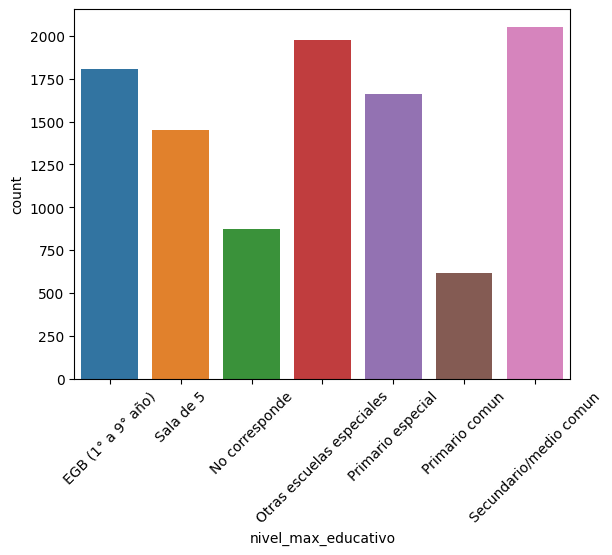

In [45]:
sns.countplot(x=dataframe['nivel_max_educativo'])
plt.xticks(rotation=45)
plt.show()

## Boxplot ingresos en funcion de años de escolaridad
con este grafico podemos observar que a medida que aumentan los años de escolaridad *parecen* aumentan los ingresos total laborables

<Axes: xlabel='años_escolaridad', ylabel='ingreso_total_lab'>

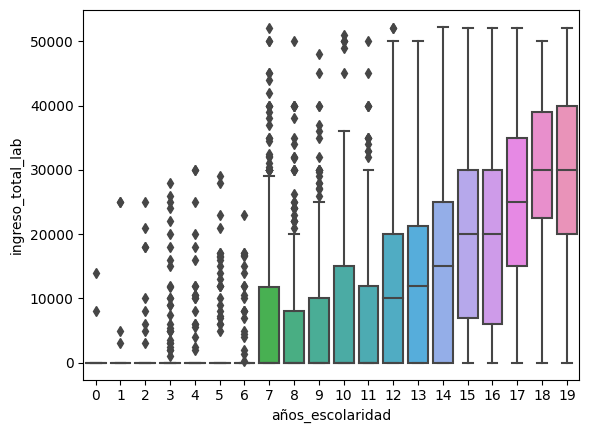

In [46]:
sns.boxplot(x=dataframe['años_escolaridad'], y=dataframe['ingreso_total_lab'])

## Boxplot ingreso total laborable
+ La distribucion de los datos es asimetrica hacia la derecha
esto tiene sentido ya que hay varias personas en el dataset que no trabajan o no tienen edad para trabajar (ponele), 
+ podemos ver que la media es de aproximadamente 13300 pesos, lo cual se aproxima al salario minimo de 2018 (11 mil pesos)

http://www.siasueldos.com/salario-m%C3%ADnimo-vital-y-m%C3%B3vil-actualizaci%C3%B3n-de-montos-septiembre-y-diciembre-2018#:~:text=24%20Septiembre%202018-,SALARIO%20M%C3%8DNIMO%20VITAL%20Y%20M%C3%93VIL%2DACTUALIZACI%C3%93N%20DE%20MONTOS%2DSEPTIEMBRE%20Y,%3A%20%24%2011.300%2C%2D%20mensuales.

+ Encontramos muchos valores atipicos lo que representa que los sueldos mas altos le corresponden a pocsas personas y la mayoria de personas tiene sueldos mas bajos

In [47]:
dataframe['ingreso_total_lab'].describe()

count    10436.000000
mean     10935.808547
std      13600.478175
min          0.000000
25%          0.000000
50%       2500.000000
75%      20000.000000
max      52249.000000
Name: ingreso_total_lab, dtype: float64

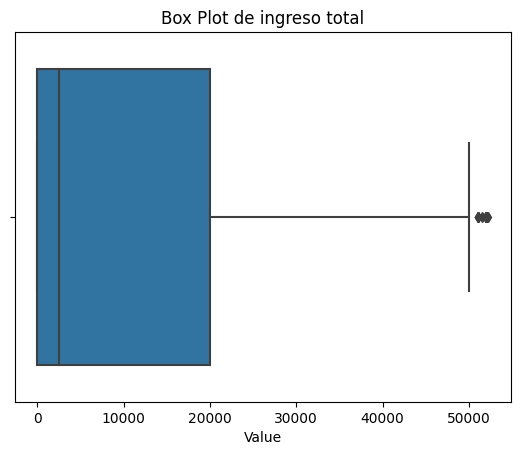

In [48]:
#dataframe['ingreso_total_lab_log'] = np.log(dataframe['ingreso_total_lab'])
sns.boxplot(x=dataframe['ingreso_total_lab'])
plt.title('Box Plot de ingreso total')
plt.xlabel('Value')
plt.show()

## Vemos la escolaridad podemos ver que en promedio las personas tienen 12 años de escolaridad lo que equivaldria a un secundario completo
+ con un describe vemos que la media esta mas cerca de 0 que la mediana, esto se debe a que hay personas que aun son muy jovenes como para ir a la escuela como tambien hay gente que no asistio o no la termino

In [49]:
dataframe['años_escolaridad'].describe()

count    10436.000000
mean        10.204101
std          5.336706
min          0.000000
25%          7.000000
50%         12.000000
75%         14.000000
max         19.000000
Name: años_escolaridad, dtype: float64

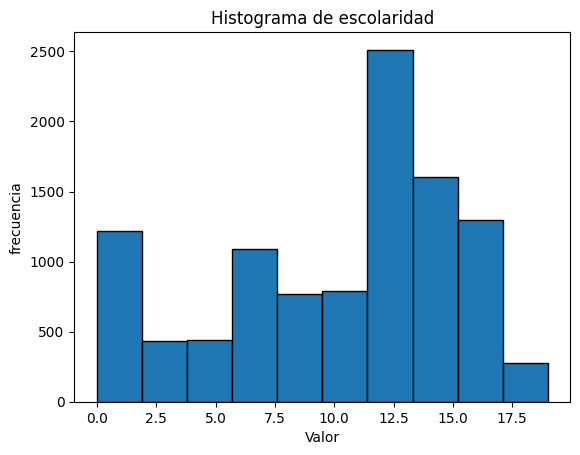

In [50]:
plt.hist(dataframe['años_escolaridad'], bins=10, edgecolor='black')
plt.title('Histograma de escolaridad')
plt.xlabel('Valor')
plt.ylabel('frecuencia')
plt.show()

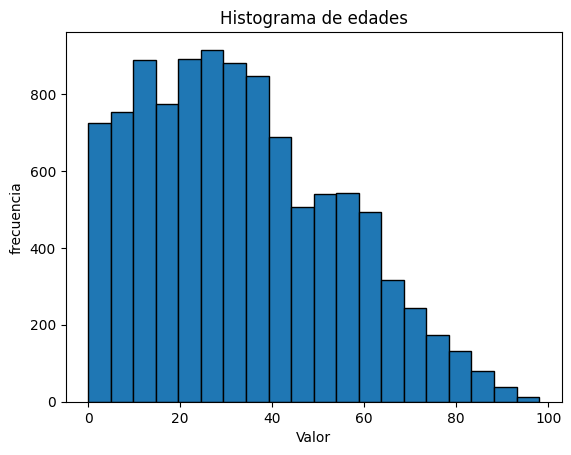

In [51]:
plt.hist(dataframe['edad'], bins=20, edgecolor='black')
plt.title('Histograma de edades')
plt.xlabel('Valor')
plt.ylabel('frecuencia')
plt.show()

## Hijos_nacidos_vivos
+ El nombre de esta variable es un poco confuso, se puede asumir que se refiere a partos
+ La idea es que No representa que la persona no tiene hijos
+ Si representa que si tiene hijos

<Axes: xlabel='hijos_nacidos_vivos', ylabel='count'>

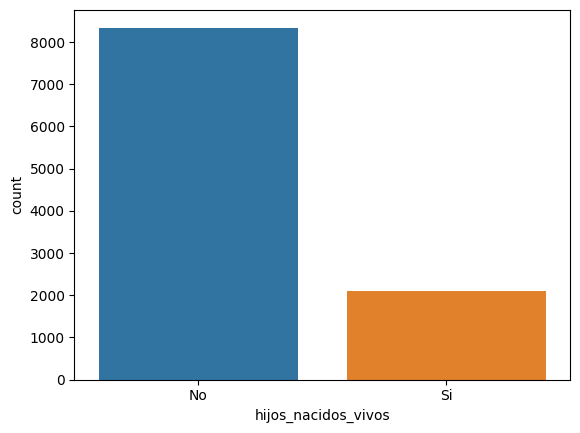

In [52]:
sns.countplot(x='hijos_nacidos_vivos', data=dataframe)

## Dominio
Usamos este plot para ver como se distribuye la gente si en partes de la ciudad o una villa de emergencia

<Axes: xlabel='dominio', ylabel='count'>

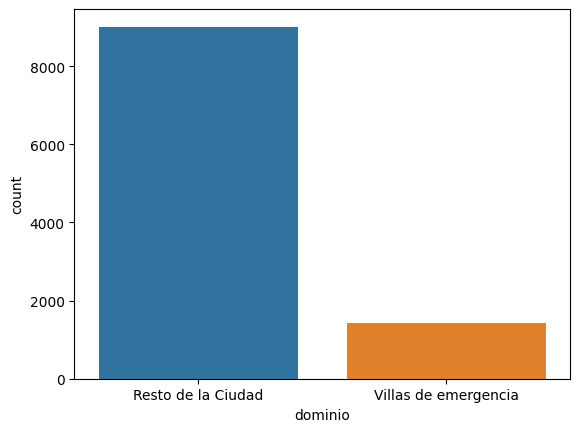

In [53]:
sns.countplot(x='dominio', data=dataframe)

In [54]:
cantidad_situacion_conyugal = dataframe['situacion_conyugal'].value_counts()

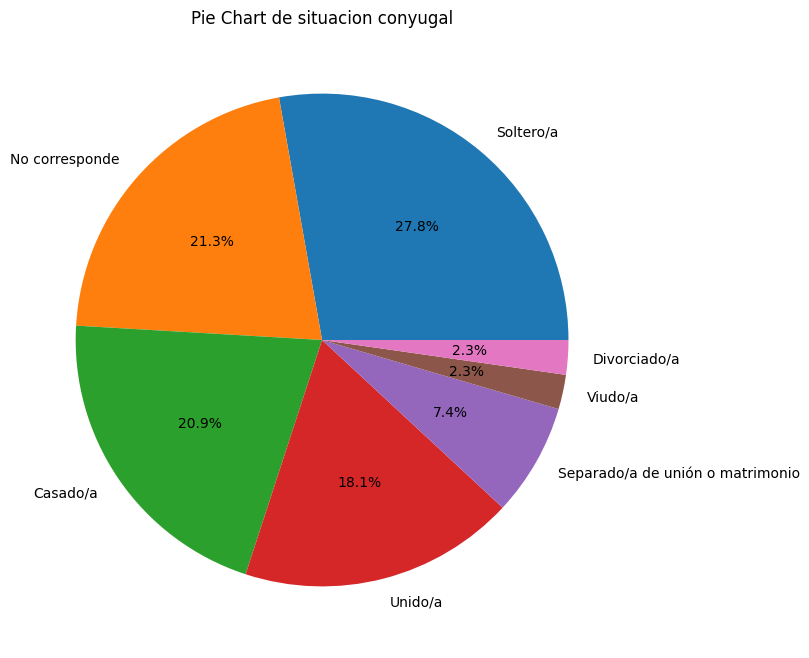

In [55]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_situacion_conyugal, labels=cantidad_situacion_conyugal.index, autopct='%1.1f%%')
plt.title('Pie Chart de situacion conyugal')
plt.show()

<Axes: xlabel='edad', ylabel='situacion_conyugal'>

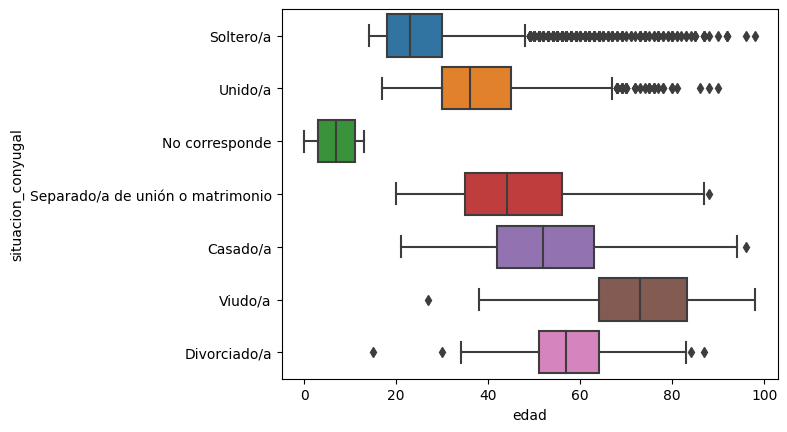

In [56]:
sns.boxplot(x=dataframe['edad'], y=dataframe['situacion_conyugal'])

In [57]:
cantidad_afiliacion_salud = dataframe['afiliacion_salud'].value_counts()

## afiliacion_salud
+ vemos la proporcion de personas que tienen cada servicio
+ despues hacemos un boxplot en funcion de los ingresos para ver si hay alguna relacion entre estas variables

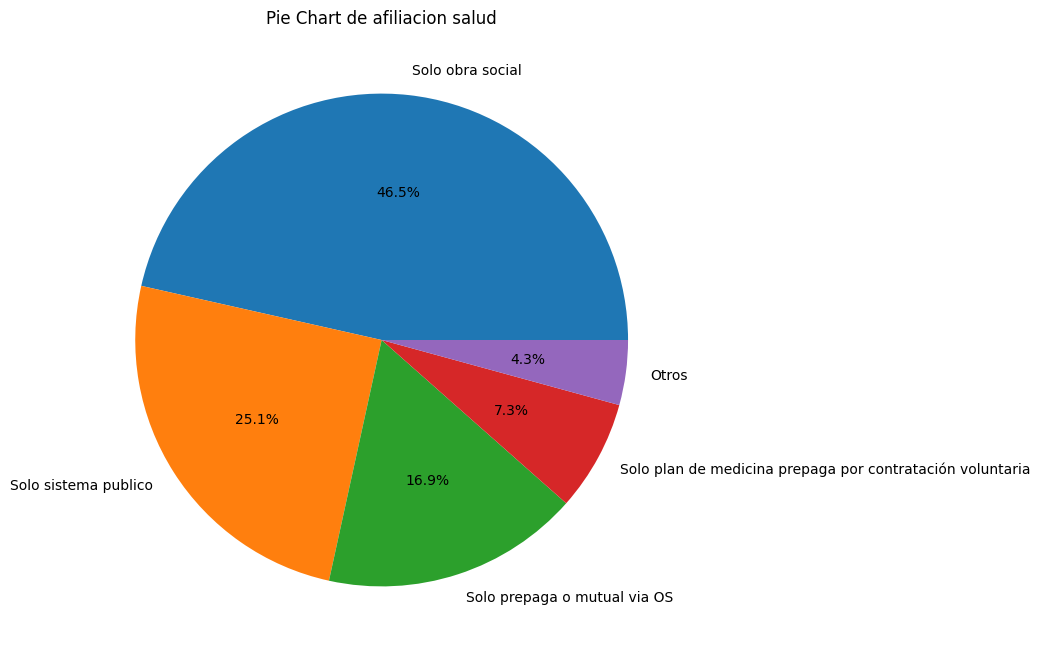

In [58]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_afiliacion_salud, labels=cantidad_afiliacion_salud.index, autopct='%1.1f%%')
plt.title('Pie Chart de afiliacion salud')
plt.show()

Text(0.5, 1.0, 'Grafico de Afiliacion_salud en funcion de los ingresos')

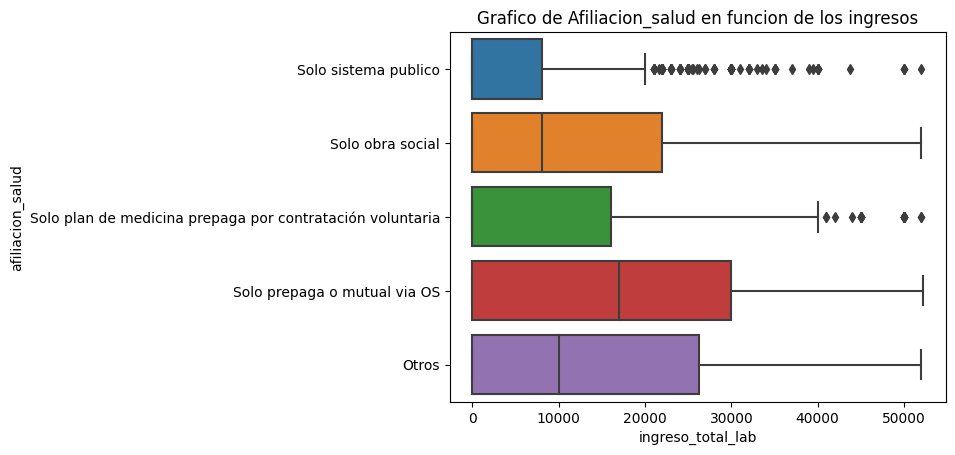

In [59]:
sns.boxplot(x=dataframe['ingreso_total_lab'], y=dataframe['afiliacion_salud'])
plt.title("Grafico de Afiliacion_salud en funcion de los ingresos")

In [90]:
dataframe.head()

,id,nhogar,miembro,comuna,edad,parentesco_jefe,num_miembro_padre,num_miembro_madre,estado_ocupacional,cat_ocupacional,calidad_ingresos_lab,ingreso_total_lab,calidad_ingresos_no_lab,ingreso_total_no_lab,calidad_ingresos_totales,ingresos_totales,calidad_ingresos_familiares,ingresos_familiares,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,cantidad_hijos_nac_vivos,resto_de_la_ciudad,villas_de_emergencia,hijos_nacidos_no,hijos_nacidos_si,sexo_mujer,sexo_varon,casado_a,divorciado_a,no_corresponde,separado_a_de_union_o_matrimonio,soltero_a,unido_a,viudo_a,Otros,Solo_obra_social,solo_plan_de_medicina_prepaga_por_contratacion_voluntaria,solo_prepaga_o_mutual_via_OS,solo_sistema_publico,pred,residuos
0,1,1,1,8,16,Jefe,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,2000,No tuvo ingresos,0,Tuvo ingresos y declara monto,2000,Tuvo ingresos y declara monto,2000,2000,No asiste pero asistió,No corresponde,No corresponde,EGB (1° a 9° año),7,Pais limitrofe,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1081.038681,918.96
1,2,1,1,9,18,Jefe,Padre no vive en el hogar,Madre no vive en el hogar,Ocupado,Asalariado,Tuvo ingresos y declara monto,500,No tuvo ingresos,0,Tuvo ingresos y declara monto,500,Tuvo ingresos pero no declara monto,17500,5833,Asiste,Estatal/publico,Secundario/medio adultos,EGB (1° a 9° año),8,CABA,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,5150.037910,-4650.04
2,2,1,2,9,37,Otro familiar,No corresponde,No corresponde,Ocupado,Asalariado,Tuvo ingresos pero no declara monto,12000,Tuvo ingresos y declara monto,5000,Tuvo ingresos pero no declara monto,17000,Tuvo ingresos pero no declara monto,17500,5833,No asiste pero asistió,No corresponde,No corresponde,Sala de 5,3,CABA,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,3328.157301,8671.84
3,2,1,3,9,0,Hijo/a - Hijastro/a,Padre no vive en el hogar,1,Inactivo,No corresponde,No corresponde,0,No corresponde,0,No corresponde,0,Tuvo ingresos pero no declara monto,17500,5833,Nunca asistio,No corresponde,No corresponde,No corresponde,0,CABA,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,-4597.842361,4597.84
4,3,1,1,2,18,Jefe,Padre no vive en el hogar,Madre no vive en el hogar,Desocupado,No corresponde,No tuvo ingresos,0,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,Tuvo ingresos y declara monto,6000,6000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,9321.922613,-9321.92


# correlaciones
en las variables numericas

<Axes: >

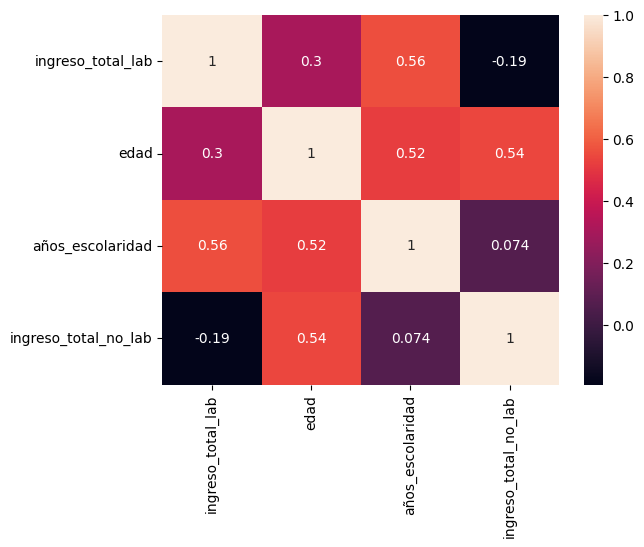

In [60]:
sns.heatmap(dataframe[['ingreso_total_lab', 'edad','años_escolaridad', 'ingreso_total_no_lab']].corr(), annot=True)

# Crear dummies

## Codear datos categoricos

+ ver que variables son numericas o categoricas

In [61]:
def num_or_cat(df):
    categorical = df.select_dtypes(include='object').columns
    numerical = df.select_dtypes(exclude='object').columns

    return(categorical, numerical)

In [62]:
categorical_cols, numerical_cols= num_or_cat(dataframe)
categorical_cols

Index(['dominio', 'sexo', 'parentesco_jefe', 'situacion_conyugal',
       'num_miembro_padre', 'num_miembro_madre', 'estado_ocupacional',
       'cat_ocupacional', 'calidad_ingresos_lab', 'calidad_ingresos_no_lab',
       'calidad_ingresos_totales', 'calidad_ingresos_familiares',
       'estado_educativo', 'sector_educativo', 'nivel_actual',
       'nivel_max_educativo', 'lugar_nacimiento', 'afiliacion_salud',
       'hijos_nacidos_vivos'],
      dtype='object')

### Codear las booleanas 
una lista (las que tienen valores 'Si' 'No', hombre mujer), despues de que las tengo las busco

In [63]:
booleanas = []
for col in categorical_cols:
    if len(dataframe[col].unique()) == 2:
        booleanas.append(col)
booleanas

['dominio', 'sexo', 'hijos_nacidos_vivos']

In [64]:
dominio_dummie = pd.get_dummies(dataframe['dominio']).astype(int)
hijos_nacidos_vivos_dummie = pd.get_dummies(dataframe['hijos_nacidos_vivos']).astype(int)
sexo_dummie = pd.get_dummies(dataframe['sexo']).astype(int)

In [65]:
dataframe = pd.concat([dataframe, dominio_dummie], axis=1)
dataframe = pd.concat([dataframe, hijos_nacidos_vivos_dummie], axis=1)
dataframe = pd.concat([dataframe, sexo_dummie], axis=1)

In [66]:
dataframe = dataframe.drop(labels='dominio',axis=1)
dataframe = dataframe.drop(labels='hijos_nacidos_vivos',axis=1)
dataframe = dataframe.drop(labels='sexo',axis=1)

In [67]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10436 entries, 0 to 14494
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           10436 non-null  int64 
 1   nhogar                       10436 non-null  int64 
 2   miembro                      10436 non-null  int64 
 3   comuna                       10436 non-null  int64 
 4   edad                         10436 non-null  int64 
 5   parentesco_jefe              10436 non-null  object
 6   situacion_conyugal           10436 non-null  object
 7   num_miembro_padre            10436 non-null  object
 8   num_miembro_madre            10436 non-null  object
 9   estado_ocupacional           10436 non-null  object
 10  cat_ocupacional              10436 non-null  object
 11  calidad_ingresos_lab         10436 non-null  object
 12  ingreso_total_lab            10436 non-null  int64 
 13  calidad_ingresos_no_lab      10436 n

### Codear situacion conyugal

In [68]:
situacion_conyugal_dummie = pd.get_dummies(dataframe['situacion_conyugal']).astype(int)

In [69]:
dataframe = pd.concat([dataframe, situacion_conyugal_dummie], axis=1)

In [70]:
dataframe = dataframe.drop(labels='situacion_conyugal',axis=1)

### afiliacion salud

In [71]:
afiliacion_salud_dummie = pd.get_dummies(dataframe['afiliacion_salud']).astype(int)

In [72]:
dataframe = pd.concat([dataframe, afiliacion_salud_dummie], axis=1)

In [73]:
dataframe = dataframe.drop(labels='afiliacion_salud',axis=1)

In [74]:
dataframe.columns

Index(['id', 'nhogar', 'miembro', 'comuna', 'edad', 'parentesco_jefe',
       'num_miembro_padre', 'num_miembro_madre', 'estado_ocupacional',
       'cat_ocupacional', 'calidad_ingresos_lab', 'ingreso_total_lab',
       'calidad_ingresos_no_lab', 'ingreso_total_no_lab',
       'calidad_ingresos_totales', 'ingresos_totales',
       'calidad_ingresos_familiares', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'estado_educativo', 'sector_educativo',
       'nivel_actual', 'nivel_max_educativo', 'años_escolaridad',
       'lugar_nacimiento', 'cantidad_hijos_nac_vivos', 'Resto de la Ciudad',
       'Villas de emergencia', 'No', 'Si', 'Mujer', 'Varon', 'Casado/a',
       'Divorciado/a', 'No corresponde', 'Separado/a de unión o matrimonio',
       'Soltero/a', 'Unido/a', 'Viudo/a', 'Otros', 'Solo obra social',
       'Solo plan de medicina prepaga por contratación voluntaria',
       'Solo prepaga o mutual via OS', 'Solo sistema publico'],
      dtype='object')

In [75]:
dataframe = dataframe.rename(columns={'Villas de emergencia': 'villas_de_emergencia',
                                       'Resto de la Ciudad': 'resto_de_la_ciudad',
                                       "No":"hijos_nacidos_no",
                                       "Si":"hijos_nacidos_si",
                                       "Mujer":"sexo_mujer",
                                       "Varon":"sexo_varon",
                                       "Casado/a":"casado_a",
                                       "Divorciado/a":"divorciado_a",
                                       'No corresponde': 'no_corresponde',
                                       "Separado/a de unión o matrimonio":"separado_a_de_union_o_matrimonio",
                                       "Soltero/a":"soltero_a",
                                       "Unido/a":"unido_a",
                                       "Viudo/a":"viudo_a",
                                       "Solo obra social":"Solo_obra_social",
                                       "Solo plan de medicina prepaga por contratación voluntaria":"solo_plan_de_medicina_prepaga_por_contratacion_voluntaria",
                                       "Solo prepaga o mutual via OS":"solo_prepaga_o_mutual_via_OS",
                                       "Solo sistema publico":"solo_sistema_publico",
                                       })


In [76]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [77]:
numerical_cols

Index(['id', 'nhogar', 'miembro', 'comuna', 'edad', 'ingreso_total_lab',
       'ingreso_total_no_lab', 'ingresos_totales', 'ingresos_familiares',
       'ingreso_per_capita_familiar', 'años_escolaridad',
       'cantidad_hijos_nac_vivos'],
      dtype='object')

# normalizacion de datos numericos

In [78]:
#dataframe['edad'] = (dataframe['edad'] - dataframe['edad'].mean()) / dataframe['edad'].std()
#dataframe['edad'] = dataframe['edad'].round(2)

In [79]:
#dataframe['años_escolaridad'] = (dataframe['años_escolaridad'] - dataframe['años_escolaridad'].mean()) / dataframe['años_escolaridad'].std()
#dataframe['años_escolaridad'] = dataframe['años_escolaridad'].round(2)

# variable a predecir: 
+ ingreso_total_lab

# Variables independientes
+ sexo (listo)
+ dominio (establece si el individuo pertenece a una villa de emergencia o al resto de la ciudad) cat (klusto)
+ situacion_conyugal cat 
+ edad num
+ afiliacion_salud cat
+ años_escolaridad num
+ hijos_nacidos_vivos cat (listo)



In [80]:
formula_base = """ingreso_total_lab ~ ingreso_total_no_lab + edad + años_escolaridad + resto_de_la_ciudad + hijos_nacidos_no + 
sexo_varon + casado_a + divorciado_a + separado_a_de_union_o_matrimonio +soltero_a + unido_a + viudo_a +
Solo_obra_social + solo_plan_de_medicina_prepaga_por_contratacion_voluntaria + solo_prepaga_o_mutual_via_OS + solo_sistema_publico"""

modelo_base = smf.ols(formula=formula_base, data=dataframe)

In [81]:
resultado_base = modelo_base.fit()
resultado_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ingreso_total_lab   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     619.3
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:47:12   Log-Likelihood:            -1.1065e+05
No. Observations:               10436   AIC:                         2.213e+05
Df Residuals:                   10419   BIC:                         2.215e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -2956.0247    655.585     -4.509      0.000   -4241.096   -1670.953
ingreso_total_no_lab                                         -1.5777      0.046    -34.610      0.000      -1.667      -1.488
edad                                                         90.8353      9.331      9.734      0.000      72.544     109.127
años_escolaridad                                           1122.5193     31.666     35.449      0.000    1060.448    1184.591
resto_de_la_ciudad                                         -512.7216    318.157     -1.612      0.107   -1136.371     110.927
hijos_nacidos_no                                           2443.5068    327.832      7.454      0.000    1800.893    3086.121
sexo_varon                                                 2138.2297    236.282      9.049      0.000    1675.071    2601.388
casado_a                                                   2911.5039    600.362      4.850      0.000    1734.679    4088.328
divorciado_a                                               5535.5271    871.828      6.349      0.000    3826.577    7244.478
separado_a_de_union_o_matrimonio                           5175.6904    624.872      8.283      0.000    3950.822    6400.559
soltero_a                                                 -2488.8780    444.726     -5.596      0.000   -3360.626   -1617.129
unido_a                                                    4041.0497    535.084      7.552      0.000    2992.182    5089.917
viudo_a                                                    1940.2808    909.568      2.133      0.033     157.353    3723.208
Solo_obra_social                                          -1451.8484    489.574     -2.966      0.003   -2411.507    -492.190
solo_plan_de_medicina_prepaga_por_contratacion_voluntaria -4429.3637    586.886     -7.547      0.000   -5579.772   -3278.956
solo_prepaga_o_mutual_via_OS                               1272.8168    527.072      2.415      0.016     239.655    2305.979
solo_sistema_publico                                      -7096.3964    528.055    -13.439      0.000   -8131.486   -6061.307
==============================================================================
Omnibus:                      653.771   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              919.612
Skew:                           0.552   Prob(JB):                    2.04e-200
Kurtosis:                       3.946   Cond. No.                     4.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

# Ajustar modelo

In [82]:
formula_ajustada = """ingreso_total_lab ~ + edad + años_escolaridad +  hijos_nacidos_no + sexo_varon + casado_a + divorciado_a + separado_a_de_union_o_matrimonio + soltero_a + unido_a + solo_prepaga_o_mutual_via_OS + solo_sistema_publico"""

In [83]:
modelo_ajustado = smf.ols(formula=formula_ajustada, data=dataframe)

In [84]:
resultado_ajustado = modelo_ajustado.fit()
resultado_ajustado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ingreso_total_lab   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     698.2
Date:                Thu, 14 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:47:12   Log-Likelihood:            -1.1126e+05
No. Observations:               10436   AIC:                         2.225e+05
Df Residuals:                   10424   BIC:                         2.226e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5657.9622    395.505    -14.306      0.000   -6433.227   -4882.697
edad                               -58.6994      7.033     -8.346      0.000     -72.486     -44.913
años_escolaridad                  1285.0685     31.037     41.405      0.000    1224.231    1345.906
hijos_nacidos_no                  2993.0602    342.222      8.746      0.000    2322.240    3663.880
sexo_varon                        2725.6892    249.185     10.938      0.000    2237.239    3214.139
casado_a                          5180.7029    481.781     10.753      0.000    4236.320    6125.086
divorciado_a                      6804.3394    811.142      8.389      0.000    5214.346    8394.332
separado_a_de_union_o_matrimonio  6886.4657    545.003     12.636      0.000    5818.155    7954.776
soltero_a                        -2377.4085    398.377     -5.968      0.000   -3158.303   -1596.514
unido_a                           6242.6704    454.506     13.735      0.000    5351.752    7133.589
solo_prepaga_o_mutual_via_OS      3669.3525    284.671     12.890      0.000    3111.342    4227.363
solo_sistema_publico             -4658.6296    251.711    -18.508      0.000   -5152.031   -4165.228
==============================================================================
Omnibus:                      501.438   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              598.817
Skew:                           0.523   Prob(JB):                    9.30e-131
Kurtosis:                       3.533   Cond. No.                         406.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Residuos

In [85]:
dataframe['pred'] = resultado_ajustado.predict(dataframe)
dataframe['residuos'] = dataframe['ingreso_total_lab']-dataframe['pred']


In [86]:
dataframe['residuos'] = dataframe['residuos'].round(2)

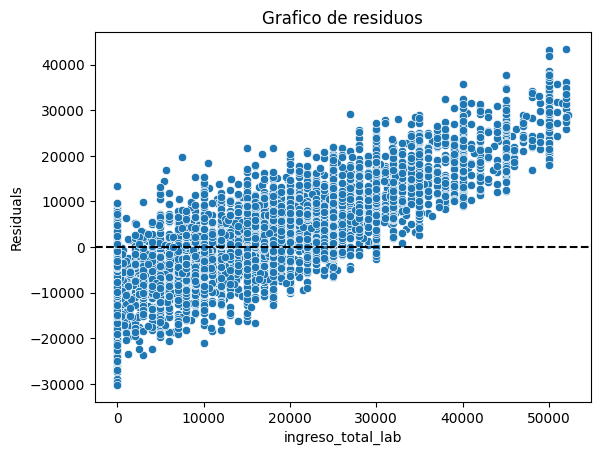

In [87]:
sns.scatterplot(x=dataframe['ingreso_total_lab'], y =dataframe['residuos'])
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('ingreso_total_lab')
plt.ylabel('Residuals')
plt.title('Grafico de residuos')
plt.show()

In [88]:
dataframe['residuos'].describe()

count    10436.000000
mean        -0.000058
std      10320.020636
min     -30232.190000
25%      -6978.180000
50%       -665.610000
75%       5507.927500
max      43472.870000
Name: residuos, dtype: float64

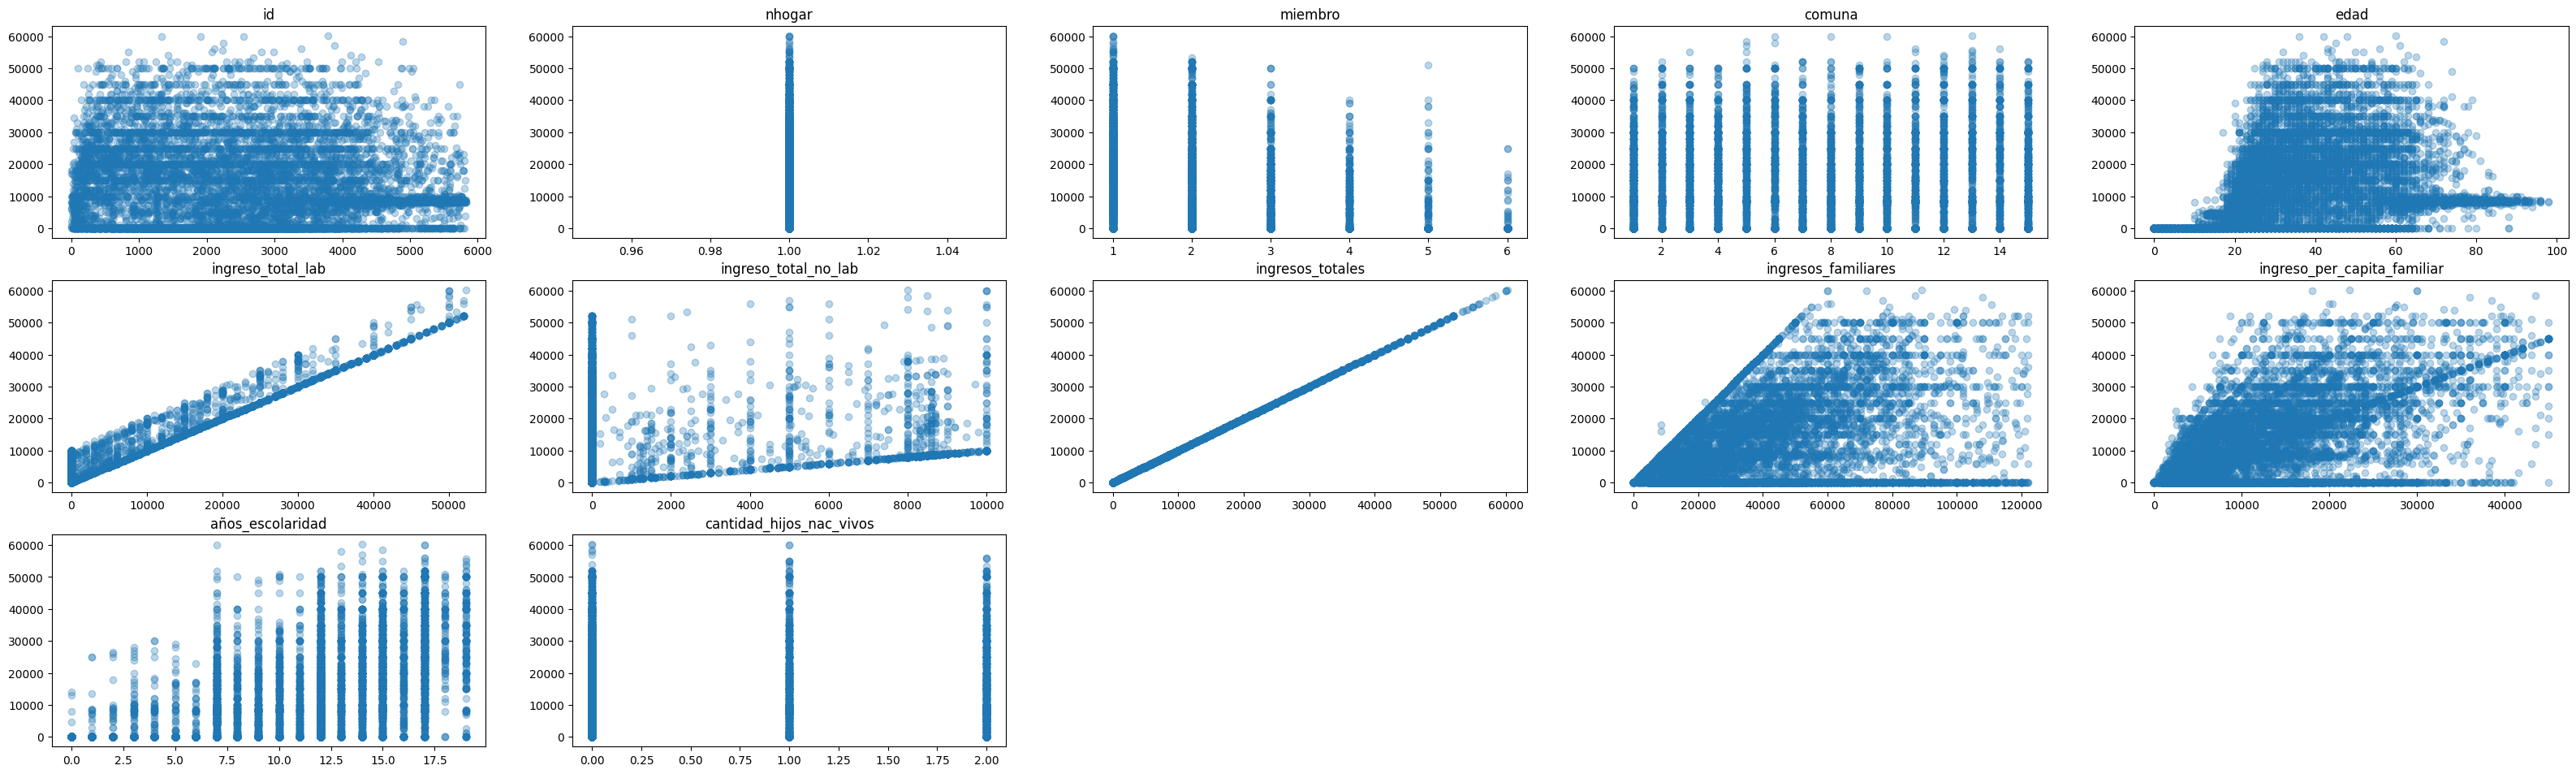

In [89]:
plt.figure(figsize=(40, 40))

for idx, col in enumerate(numerical_cols, start=1):  
    plt.subplot(10, 5, idx)
    plt.scatter(data=dataframe, x=col, y='ingresos_totales', alpha=.3)
    plt.title(col)